2 assemblies. Neuron Size = 25, 50, 75

# Step 1, Set threshold = 0.1


## Set Assembly

In [1]:
import warnings
# 仅在这个context里忽略警告
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    from coniii import *
import numpy as np
from tqdm.auto import tqdm
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import random
import generate_assembly #In the same dir
import generate_SpikeCount #In the same dir
from scipy.stats import poisson
import time
import math

warnings.filterwarnings("ignore")


# Define Parameters
T = 3600 # time of simul“ation
dT = 0.5 # time step
params_assembly_density = 3 # size of neurons in each assembly
params_assembly_num =2 # number of assemblies
params_point_into_neuron_distance = 0.5 

# Length of an active event as a number of timesteps
eventDur = np.random.randint(1, 10)
# Probability with which a unit is particularly active in a single timestep
eventProb = np.random.uniform(0.01, 0.05)
# Firing rate multiplier at active events
eventMult = np.random.uniform(6, 10)  # random number between 1 and 5
showPlot = False

In [26]:
N = [25,36,49,64,81,100]

assemblies_list = []
spikeCount_list = []

for n in N:
    fire_rate_background = np.random.uniform(1, 6, n)
    # Here's some preparatory code, we don't count its execution time
    assemblies = generate_assembly.generate_assembly_solve(n, params_assembly_num, params_assembly_density)
    # Output 0, 1 type spikes
    spikeCount = generate_SpikeCount.generateSpikeCountSolve(n, T, dT, assemblies, (1, 6), eventDur, eventProb, eventMult, showPlot)
    # Transform to -1, 1 distribution
    spikeCount[spikeCount == 0] = -1
    assemblies_list.append(assemblies)
    spikeCount_list.append(spikeCount)

print(assemblies_list)

[[[20, 15, 21], [20, 16]], [[18, 30, 14], [30, 31]], [[6, 13], [12, 26, 13]], [[21, 29, 39], [45, 39]], [[36, 37, 20], [36, 45]], [[53, 34, 86], [86, 76]]]


## Run the code 10 times per Neuron Size

In [5]:
# Define a function to encapsulate the code you want to time
def code_to_time(spikeCount,threshold):
    solver = ClusterExpansion(spikeCount)
    multipliers, ent, clusters, deltaSdict, deltaJdict= solver.solve(threshold, full_output=True)

In [27]:
time_taken = []
mean_times = []

threshold = [0.1, 0.01, 0.001]

# Create a dictionary to store the results for each threshold
results = {thresh: {'times': [], 'means': []} for thresh in threshold}

for thresh in threshold:
    for i in range(len(spikeCount_list)):
        iter_times = []
        for _ in range(5):
            # Record start time
            start_time = time.time()

            # Execute the code function
            result = code_to_time(spikeCount_list[i], thresh)

            # Record end time
            end_time = time.time()

            # Calculate execution time and add to list
            iter_times.append(end_time - start_time)

        # Dictionary of results for calculating average time and adding to thresholds
        results[thresh]['means'].append(np.mean(iter_times))
        # Dictionary of results of adding ALL runtimes
        results[thresh]['times'].extend(iter_times)



In [28]:
results

{0.1: {'times': [0.8905460834503174,
   0.8896236419677734,
   1.1452300548553467,
   0.8693230152130127,
   0.8835952281951904,
   1.3275668621063232,
   1.3379812240600586,
   1.5441088676452637,
   1.3187382221221924,
   1.3399322032928467,
   2.080690860748291,
   2.321021795272827,
   2.0706028938293457,
   2.0558230876922607,
   2.0731329917907715,
   3.1727700233459473,
   3.415363073348999,
   3.222670793533325,
   3.1809611320495605,
   3.1764779090881348,
   4.999892950057983,
   5.17231011390686,
   4.970321178436279,
   4.9142491817474365,
   4.957507133483887,
   7.533246278762817,
   7.640777349472046,
   7.4718098640441895,
   7.564259767532349,
   7.482256889343262],
  'means': [0.9356636047363281,
   1.3736654758453368,
   2.120254325866699,
   3.233648586273193,
   5.002856111526489,
   7.538470029830933]},
 0.01: {'times': [1.0162580013275146,
   1.026066780090332,
   1.3264288902282715,
   1.024596929550171,
   1.026357889175415,
   1.4380300045013428,
   1.44525599

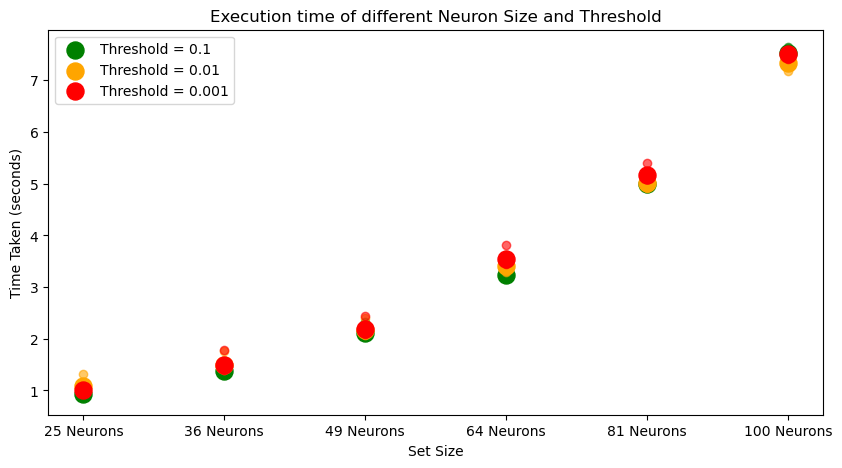

In [30]:
colors = ['green', 'orange', 'red']

# Scatterplotting
plt.figure(figsize=(10, 5))

for i, thresh in enumerate(threshold):
    for j in range(len(spikeCount_list)):
        label = f'Threshold = {thresh}' if j == 0 else None
        
        plt.scatter((j+1) * np.ones(5), results[thresh]['times'][j*5:(j+1)*5], color=colors[i], alpha=0.6)
        plt.scatter(j+1, results[thresh]['means'][j], color=colors[i], marker='o', s=150, label=label)

plt.xlabel('Set Size')
plt.ylabel('Time Taken (seconds)')
plt.title('Execution time of different Neuron Size and Threshold')
plt.xticks(range(1, len(spikeCount_list)+1), [f'{N[i]} Neurons' for i in range(len(spikeCount_list))])
plt.legend()
plt.show()